In [4]:
import json
import numpy as np

## 统一要求

In [ ]:
# 2d 结构？ 3d结构？（不只有theta了） 所有可能的目标结构？

In [ ]:
# 不管怎么样，先验证之前经典的结构

In [2]:
def target2ori_num(target_name):

    with open(f'./{target_name}.json', 'r') as file:
        data = json.load(file)
    return len(data['cell_point'])

In [19]:
def get_std_ori(target_name):
    with open(f'./{target_name}.json', 'r') as file:
        data = json.load(file)
    return data['orientation']

In [3]:
target2ori_num('31212')

6

array([1.04719755, 5.23598776, 3.14159265, 0.        , 2.0943951 ,
       4.1887902 ])

In [5]:

def check_in_box(points,lx,ly,xy):
    new_points = points.copy()

    va = np.array([lx,0,0])
    vb = np.array([xy*ly,ly,0])

    vc = points - np.array([-lx/2-(xy*ly)/2,-ly/2,0])

    aa = np.dot(va,va)
    ab = np.dot(va,vb)
    bb = np.dot(vb,vb)
    ac = np.dot(va,vc)
    bc = np.dot(vb,vc)


    fb = (ac*ab-bc*aa)/(ab*ab-aa*bb)
    fa = (ac-ab*fb)/(aa)

    if 0<=fb<=1 and 0<=fa<=1:
        pass
        # print("inside")
    else:
        # print(points)
        if fb<0 :
            new_points = new_points+vb
        elif fb>1:
            new_points = new_points-vb
        else:
            pass
        if fa<0 :
            new_points = new_points+va
        elif fa>1:
            new_points = new_points-va
        else:
            pass
        # print(new_points)
    return new_points

In [6]:
def init4neg(target_name,pad = 1.05,is_baby = False):
    #控制pad distance(<1.1),total number在100和300之间,pbc(direction)旋转,position盒子内
    #输出density,total number,每个位置对应的类别



    with open(f'./{target_name}.json', 'r') as file:
        data = json.load(file)


    dm = len(data['cell_vec'])#1d和2d有些区别？

    # print(dm)

    #number control
    if dm ==1:
        cell_num = 10
    elif dm == 2:
        if is_baby:
            cell_num = 2
        else:
            cell_num = 4
    else:
        pass


    # points generate
    points = []
    if dm == 1:
        for i in range(cell_num):
            # cp_id = 0
            # cell_timer = 0
            for cp in data["cell_point"]:
                x = cp[0]+i*data['cell_vec'][0][0]
                y = cp[1]+i*data['cell_vec'][0][1]
                points.append([x,y,0])
                # ax.plot([x, x+0.5*math.cos(2*math.pi/360*data["orientation"][cell_timer])], [y, y+0.5*math.sin(2*math.pi/360*data["orientation"][cell_timer])], 'red',linewidth = 8)
                # cell_timer+=1
                # for ee in range(len(data["edge_start"])):
                    # if data["edge_start"][ee] == cp_id:
                        # ax.plot([x, x+0.5*math.cos(2*math.pi/360*data["degree_start"][ee])], [y, y+0.5*math.sin(2*math.pi/360*data["degree_start"][ee])], '#FFD800',linewidth = 3)
                    # if data["edge_end"][ee] == cp_id:
                        # ax.plot([x, x+0.5*math.cos(2*math.pi/360*data["degree_end"][ee])], [y, y+0.5*math.sin(2*math.pi/360*data["degree_end"][ee])], '#FFD800',linewidth = 3)
                # cp_id+=1
    else:
        for i in range(cell_num):
            for j in range(cell_num):
                # cp_id = 0
                # cell_timer = 0
                for cp in data["cell_point"]:
                    x = cp[0]+i*data['cell_vec'][0][0]+j*data['cell_vec'][1][0]
                    y = cp[1]+i*data['cell_vec'][0][1]+j*data['cell_vec'][1][1]
                    points.append([x,y,0])
                    # ax.plot([x, x+0.5*math.cos(2*math.pi/360*data["orientation"][cell_timer])], [y, y+0.5*math.sin(2*math.pi/360*data["orientation"][cell_timer])], 'red',linewidth = 8)
                    # cell_timer+=1
                    # for ee in range(len(data["edge_start"])):
                        # if data["edge_start"][ee] == cp_id:
                            # ax.plot([x, x+0.5*math.cos(2*math.pi/360*data["degree_start"][ee])], [y, y+0.5*math.sin(2*math.pi/360*data["degree_start"][ee])], '#FFD800',linewidth = 3)
                        # if data["edge_end"][ee] == cp_id:
                            # ax.plot([x, x+0.5*math.cos(2*math.pi/360*data["degree_end"][ee])], [y, y+0.5*math.sin(2*math.pi/360*data["degree_end"][ee])], '#FFD800',linewidth = 3)
                    # cp_id+=1

    points = pad*np.array(points)

    cell_vec = pad*np.array(data['cell_vec'])


    # print(points)
    is_r = False
    bias_angle = 0

    #如果第一个基向量与x轴不平行。就整体绕原点旋转到第一个基向量与x轴平行，2个轴也要随之改变
    if data['cell_vec'][0][1] != 0:
        # print("r")
        if data['cell_vec'][0][1] >0:
            #顺时针旋转
            angle = np.arctan(data['cell_vec'][0][1]/data['cell_vec'][0][0])
            bias_angle = -angle*180/np.pi
            new_points = points.copy()
            new_cell_vec = cell_vec.copy()

            new_points[:,0]=points[:,0]*np.cos(-angle) -points[:,1]*np.sin(-angle)
            new_points[:,1]=points[:,0]*np.sin(-angle) +points[:,1]*np.cos(-angle)

            new_cell_vec[:,0]=cell_vec[:,0]*np.cos(-angle) -cell_vec[:,1]*np.sin(-angle)
            new_cell_vec[:,1]=cell_vec[:,0]*np.sin(-angle) +cell_vec[:,1]*np.cos(-angle)
            is_r = True
        elif data['cell_vec'][0][1] <0:
            #逆时针旋转
            angle = -np.arctan(data['cell_vec'][0][1]/data['cell_vec'][0][0])
            bias_angle = angle*180/np.pi
            new_points = points.copy()
            new_cell_vec = cell_vec.copy()

            new_points[:,0]=points[:,0]*np.cos(angle) -points[:,1]*np.sin(angle)
            new_points[:,1]=points[:,0]*np.sin(angle) +points[:,1]*np.cos(angle)

            new_cell_vec[:,0]=cell_vec[:,0]*np.cos(angle) -cell_vec[:,1]*np.sin(angle)
            new_cell_vec[:,1]=cell_vec[:,0]*np.sin(angle) +cell_vec[:,1]*np.cos(angle)
            is_r = True
        else:
            pass
        # print(new_points,new_cell_vec)
    else:
        pass

    #按照公式生成平行四边形盒子

    if dm == 1:
        v1 = cell_num*cell_vec[0]
        v2 = cell_num*np.array([0,1])
        # if target_name == "333i":
        #     v2 = cell_num*np.array([-1/2,1/2*(3**(1/2))])
        # else:
        #     v2 = cell_num*np.array([0,1])
    else:
        if is_r:
            v1 = cell_num*new_cell_vec[0]
            v2 = cell_num*new_cell_vec[1]
        else:
            v1 = cell_num*cell_vec[0]
            v2 = cell_num*cell_vec[1]


    Lx = ((v1**2).sum())**(1/2)
    a_2x = (v1[0]*v2[0]+v1[1]*v2[1])/Lx
    Ly = (((v2**2).sum())-a_2x**2)**(1/2)
    xy = a_2x/Ly


    #平移，直到原点与hoomdblue盒子原点重合

    # pos = points-np.array([Lx/2,Ly/2,0])
    if is_r:
        pos = new_points-np.array([Lx/2+(xy*Ly)/2,Ly/2,0])
    else:
        pos = points-np.array([Lx/2+(xy*Ly)/2,Ly/2,0])
    # print(pos)

    #check all are inside:
    new_pos = []
    for i in pos:
        new_pos.append(check_in_box(i,Lx,Ly,xy))
    # print(pos,new_pos)


    #total number
    num = len(new_pos)
    #输出density
    density = num*(np.pi*(0.5)*(0.5))/(Lx*Ly)

    #每个位置对应的类别和目标方向（按顺序，需要cell_num）
    return new_pos,num,Lx,Ly,xy,density,bias_angle

In [16]:
pos,num,Lx,Ly,xy,density,bias_angle = init4neg('33336',is_baby=False)

In [27]:
ori_num = target2ori_num('31212')
std_ori = ((90-np.array(get_std_ori('31212')))%360)*2*np.pi/360

In [28]:
all_ori = np.array([std_ori[i%ori_num] for i in range(num)])

In [266]:
target_name = '488'
ori_num = target2ori_num(target_name)
std_ori = ((90-np.array(get_std_ori(target_name)))%360)*2*np.pi/360/20 # noise
all_ori = np.array([std_ori[i%ori_num] for i in range(num)])
pos,num,Lx,Ly,xy,_,_ = init4neg(target_name,is_baby=False)

In [267]:
new_pos = np.array(pos)+Lx/2

In [268]:
new_pos[:,2] = all_ori

In [269]:
new_pos_tensor = torch.tensor(new_pos,dtype=torch.float32)

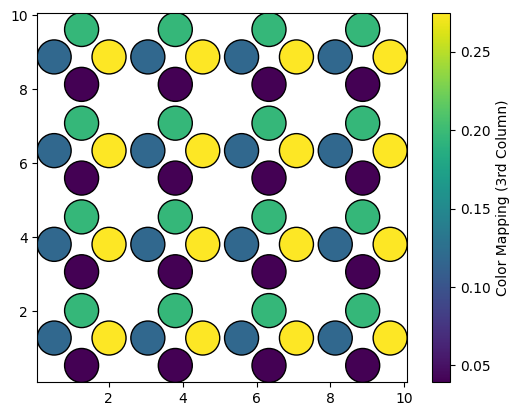

In [270]:
import numpy as np
import matplotlib.pyplot as plt

# 假设你有一个 n * 3 的 NumPy array
n = 50  # 示例的 n 值
array = new_pos

# 前两列作为 x, y 坐标，第三列作为颜色映射
x = array[:, 0]
y = array[:, 1]
colors = array[:, 2]

# 绘制散点图，s 是点的大小，c 是颜色，cmap 是颜色映射表
plt.scatter(x, y, s=600, c=colors, cmap='viridis', edgecolor='black')

# 保证 x 和 y 轴的比例相同
plt.gca().set_aspect('equal', adjustable='box')

# 添加颜色条
plt.colorbar(label='Color Mapping (3rd Column)')

# 显示图像
plt.show()

## 加噪音

In [271]:
import torch
import torch.nn as nn
import torch.nn.init as init

In [272]:
def get_sigma_schedule(*, beta_start, beta_end, num_diffusion_timesteps):
    """
    Get the noise level schedule
    :param beta_start: begin noise level
    :param beta_end: end noise level
    :param num_diffusion_timesteps: number of timesteps
    :return:
    -- sigmas: sigma_{t+1}, scaling parameter of epsilon_{t+1}
    -- a_s: sqrt(1 - sigma_{t+1}^2), scaling parameter of x_t
    """
    betas = np.linspace(beta_start, beta_end, 1000, dtype=np.float64)
    betas = np.append(betas, 1.)
    assert isinstance(betas, np.ndarray)
    betas = betas.astype(np.float64)
    assert (betas > 0).all() and (betas <= 1).all()
    sqrt_alphas = np.sqrt(1. - betas)
    temp = np.concatenate([np.arange(num_diffusion_timesteps) * (1000 // ((num_diffusion_timesteps - 1) * 2)), [999]])
    idx = temp.astype(np.int32)
    a_s = np.concatenate(
        [[np.prod(sqrt_alphas[: idx[0] + 1])],
         np.asarray([np.prod(sqrt_alphas[idx[i - 1] + 1: idx[i] + 1]) for i in np.arange(1, len(idx))])])
    sigma = np.sqrt(1 - a_s ** 2)

    return sigma, a_s

In [273]:
class RecoveryLikelihoodRaw(nn.Module):
    def __init__(self):
        super(RecoveryLikelihoodRaw, self).__init__()
        self.num_timesteps = 10
        sigmas, a_s = get_sigma_schedule(beta_start=0.00001, beta_end=0.00002, num_diffusion_timesteps=self.num_timesteps)
        self.sigmas = torch.FloatTensor(sigmas)
        self.a_s = torch.FloatTensor(a_s)
        self.a_s_cum = torch.FloatTensor(np.cumprod(a_s))
        self.sigmas_cum = torch.sqrt(1 - self.a_s_cum ** 2)
        self.a_s_prev = self.a_s.clone()
        self.a_s_prev[-1] = 1
        self.is_recovery = torch.ones(self.num_timesteps + 1)
        self.is_recovery[-1] = 0


    @staticmethod
    def _extract(a, t, x_shape):
        """
        Extract some coefficients at specified timesteps,
        then reshape to [batch_size, 1, 1, 1, 1, ...] for broadcasting purposes.
        """
        if isinstance(t, int) or len(t.shape) == 0:
            t = torch.ones(x_shape[0], dtype=torch.int64) * t
        bs, = t.shape
        assert x_shape[0] == bs
        out = a[t]
        # out = tf.gather(tf.convert_to_tensor(a, dtype=tf.float32), t)
        # print(out.shape, t.shape, bs)
        assert list(out.shape) == [bs]
        return torch.reshape(out, [bs] + ((len(x_shape) - 1) * [1]))

    def q_sample(self, x_start, t, noise=None):
        """
        Diffuse the data (t == 0 means diffused for 1 step)
        """
        if noise is None:
            noise = torch.randn_like(x_start)
        assert noise.shape == x_start.shape
        x_t = self._extract(self.a_s_cum, t, x_start.shape) * x_start + \
              self._extract(self.sigmas_cum, t, x_start.shape) * noise

        return x_t


    def q_sample_pairs(self, x_start, t):
        """
        Generate a pair of disturbed images for training
        :param x_start: x_0
        :param t: time step t
        :return: x_t, x_{t+1}
        """
        noise = torch.randn_like(x_start)
        x_t = self.q_sample(x_start, t)
        x_t_plus_one = self._extract(self.a_s, t + 1, x_start.shape) * x_t + \
                       self._extract(self.sigmas, t + 1, x_start.shape) * noise

        return x_t, x_t_plus_one




In [274]:
testRL = RecoveryLikelihoodRaw()

In [288]:
noise_pos_t5 = testRL.q_sample(new_pos_tensor,10)

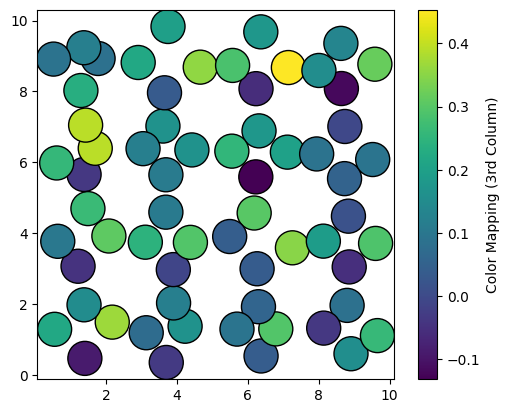

In [287]:
import numpy as np
import matplotlib.pyplot as plt

# 假设你有一个 n * 3 的 NumPy array
n = 50  # 示例的 n 值
array = noise_pos_t5.cpu().numpy()

# 前两列作为 x, y 坐标，第三列作为颜色映射
x = array[:, 0]
y = array[:, 1]
colors = array[:, 2]

# 绘制散点图，s 是点的大小，c 是颜色，cmap 是颜色映射表
plt.scatter(x, y, s=600, c=colors, cmap='viridis', edgecolor='black')

# 保证 x 和 y 轴的比例相同
plt.gca().set_aspect('equal', adjustable='box')

# 添加颜色条
plt.colorbar(label='Color Mapping (3rd Column)')

# 显示图像
plt.show()

In [283]:
atest,btest = testRL.q_sample_pairs(new_pos_tensor,8)

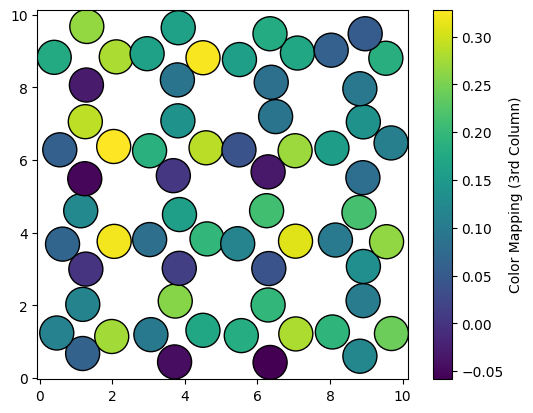

In [284]:
import numpy as np
import matplotlib.pyplot as plt

# 假设你有一个 n * 3 的 NumPy array
n = 50  # 示例的 n 值
array = atest.cpu().numpy()

# 前两列作为 x, y 坐标，第三列作为颜色映射
x = array[:, 0]
y = array[:, 1]
colors = array[:, 2]

# 绘制散点图，s 是点的大小，c 是颜色，cmap 是颜色映射表
plt.scatter(x, y, s=600, c=colors, cmap='viridis', edgecolor='black')

# 保证 x 和 y 轴的比例相同
plt.gca().set_aspect('equal', adjustable='box')

# 添加颜色条
plt.colorbar(label='Color Mapping (3rd Column)')

# 显示图像
plt.show()

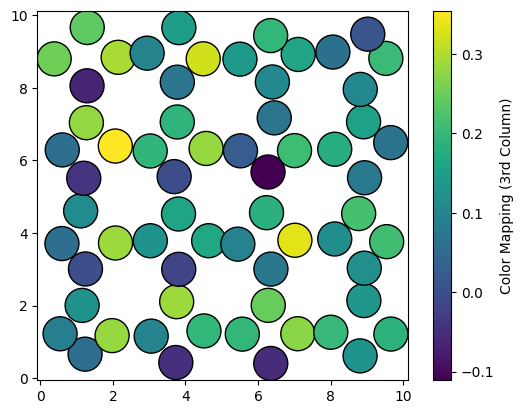

In [285]:
import numpy as np
import matplotlib.pyplot as plt

# 假设你有一个 n * 3 的 NumPy array
n = 50  # 示例的 n 值
array = btest.cpu().numpy()

# 前两列作为 x, y 坐标，第三列作为颜色映射
x = array[:, 0]
y = array[:, 1]
colors = array[:, 2]

# 绘制散点图，s 是点的大小，c 是颜色，cmap 是颜色映射表
plt.scatter(x, y, s=600, c=colors, cmap='viridis', edgecolor='black')

# 保证 x 和 y 轴的比例相同
plt.gca().set_aspect('equal', adjustable='box')

# 添加颜色条
plt.colorbar(label='Color Mapping (3rd Column)')

# 显示图像
plt.show()

## 下一步就是借助朗之万的力量了

In [290]:
import torch
import torch.nn as nn
import numpy as np
import math
import torch.nn.functional as F


In [291]:
def get_timestep_embedding(timesteps, embedding_dim: int):
    """
    From Fairseq. Build sinusoidal embeddings.
    """
    assert len(timesteps.shape) == 1  # and timesteps.dtype == torch.int32

    half_dim = embedding_dim // 2
    emb = math.log(10000) / (half_dim - 1)
    emb = torch.exp(torch.arange(0, half_dim) * -emb).to(timesteps.device)
    emb = torch.matmul(1.0 * timesteps.reshape(-1, 1), emb.reshape(1, -1))
    emb = torch.cat([torch.sin(emb), torch.cos(emb)], dim=1)
    if embedding_dim % 2 == 1:  # zero pad
        emb = F.pad(emb, [0, 1, 0, 0])
    assert list(emb.shape) == [timesteps.shape[0], embedding_dim]
    return emb


In [292]:
class FourierFeatureMLP(nn.Module):
    def __init__(self, num_fourier_features=10, hidden_dim=128):
        super(FourierFeatureMLP, self).__init__()
        # Fourier特征映射参数
        self.num_fourier_features = num_fourier_features
        self.B = torch.randn(2, num_fourier_features) * 2 * np.pi  # Fourier 特征的频率矩阵
        # MLP
        self.mlp = nn.Sequential(
            nn.Linear(num_fourier_features * 2, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()  # 确保输出大于0的激活函数
        )

    def forward(self, angle):
        # Fourier 特征映射
        # print(angle)
        # angle = angle.unsqueeze(0)
        if angle.dim() == 0:  # 如果是1维的, 添加一个维度变为 (N, 1)
            angle = angle.unsqueeze(0)
        else:
            angle = angle.unsqueeze(-1)

        theta_sin_cos = torch.cat([torch.sin(angle), torch.cos(angle)], dim=-1)

        fourier_features = torch.cat([torch.sin(theta_sin_cos @ self.B), torch.cos(theta_sin_cos @ self.B)], dim=-1)
        # MLP 输出
        output = self.mlp(fourier_features)
        return output


In [299]:
class ParticleSystemTorch:
    def __init__(self, L, N, r, epsilon, sigma,epsilon_dim=128):
        super(ParticleSystemTorch, self).__init__()
        self.L = L  # 盒子长度
        self.N = N  # 粒子数目
        self.r = r  # 粒子半径
        self.epsilon = epsilon  # Lennard-Jones 势能深度
        self.sigma = sigma  # Lennard-Jones 势能参数
        self.particles = self.initialize_particles()  # 初始化粒子
        self.particles_warm = self.warm_up()

        self.epsilon_dim = epsilon_dim
        self.epsilon_mlp = nn.Sequential(
            nn.Linear(epsilon_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 1),  # 输出一个标量 epsilon
            nn.Sigmoid()
        )

        # 初始化角度相关势能的神经网络
        self.angle_nn = FourierFeatureMLP()
        # self.angle_nn = PeriodicNN(input_dim=1,hidden_dim = 128,output_dim=1)

    def epsilon_plus(self, t):
        # 获取时间嵌入
        if isinstance(t, int) or len(t.shape) == 0:
            t = torch.tensor([t], dtype=torch.float32)  # 确保 t 是 tensor
        temb = get_timestep_embedding(t, self.epsilon_dim)  # 生成时间嵌入
        return 1+9*self.epsilon_mlp(temb)

    def initialize_particles_old(self):
        # 初始化粒子的坐标和取向 (转换为PyTorch张量)
        particles = []
        for _ in range(self.N):
            x = torch.rand(1) * self.L  # 随机x坐标
            y = torch.rand(1) * self.L  # 随机y坐标
            theta = torch.rand(1) * 2 * np.pi  # 随机取向
            particles.append((x, y, theta))
        return particles

    def periodic_distance(self,p1, p2, box_size):
        delta_x = abs(p1[0] - p2[0])
        delta_y = abs(p1[1] - p2[1])

        # 处理周期性边界条件
        if delta_x > box_size / 2:
            delta_x = box_size - delta_x
        if delta_y > box_size / 2:
            delta_y = box_size - delta_y

        return np.sqrt(delta_x**2 + delta_y**2)

    def is_overlapping(self,new_circle, circle_centers, box_size, radius):
        for center in circle_centers:
            if self.periodic_distance(new_circle, center, box_size) < 2 * radius:
                return True
        return False

    def initialize_particles(self):

        positions = np.zeros((self.N, 3))
        numLatticesX = round(math.sqrt(self.N))
        numLatticesY = math.ceil(self.N/numLatticesX)
        for iatom in range(self.N):
            positions[iatom, 0] = (iatom%numLatticesX+0.5)*(self.L/numLatticesX) + np.random.rand()*0.5
            positions[iatom, 1] = (math.floor(iatom/numLatticesX)+0.5)*(self.L/numLatticesY) + np.random.rand()*0.5
            positions[iatom, 2] = np.random.uniform(0, 2 * np.pi)

        return torch.from_numpy(positions).float()

    def warm_up(self):
        masses = np.ones(self.N)
        energies = np.zeros(self.N)
        forces = np.zeros((self.N, 2))
        accelerations = np.zeros((self.N, 2))
        positions = self.particles.cpu().numpy()

        numSteps = 150
        timeStep = 0.01
        velocities = np.random.rand(self.N, 2) - 0.5

        for istep in range(numSteps):
            positions = self.update_positions(positions, velocities, timeStep)
            positions = self.boundary_conditions(positions)
            forces = self.lj_potential_warm(energies, forces, positions, epsilon, sigma)
            velocities = self.update_velocities(forces, masses, accelerations, velocities, timeStep)
            velocities = self.thermostat(velocities, masses)
        return torch.from_numpy(positions).float()


    def update_positions(self,positions, velocities, timeStep):
        for atom in range(self.N):
            for col in [0, 1]:
                positions[atom, col] += timeStep * velocities[atom, col]
        return positions

    def boundary_conditions(self,positions):
        for atom in range(self.N):
            for col in [0, 1]:
                positions[atom, col] = positions[atom, col] - self.L * np.round(positions[atom, col] / self.L)+self.L/2
        return positions




    def lj_potential_warm(self,energies, forces, positions, epsilon, sigma):
        for iatom in range(self.N-1):
            for jatom in range(iatom+1, self.N):
                dist_square = 0.0 # square of distance
                for col in [0, 1]:
                    dist_col = positions[iatom, col] - positions[jatom, col]
                    if dist_col > self.L/2.0:
                        dist_col -= self.L
                    if dist_col < -self.L/2.0:
                        dist_col += self.L
                    dist_square += dist_col**2
                dist = math.sqrt(dist_square)

                energy = 4.0*epsilon*((sigma/dist)**12 - (sigma/dist)**6)
                energies[iatom] += 0.5*energy # Accumulate energy
                energies[jatom] += 0.5*energy

                force_repulsion = 48.0*epsilon*(sigma/dist)**12
                force_attraction = -24.0*epsilon*(sigma/dist)**6
                force = force_repulsion + force_attraction

                for col in [0, 1]:
                    dist_col = positions[iatom, col] - positions[jatom, col]
                    if dist_col > self.L/2.0:
                        dist_col -= self.L
                    if dist_col < -self.L/2.0:
                        dist_col += self.L
                    forces[iatom, col] += (force*dist_col/dist_square)
                    forces[jatom, col] -= (force*dist_col/dist_square)
        return  forces

    def update_velocities(self,forces, masses, accelerations, velocities, timeStep):
        for iatom in range(self.N):
            for col in [0, 1]:
                accelerations[iatom, col] = forces[iatom, col]/masses[iatom]
                velocities[iatom, col] += accelerations[iatom, col]*timeStep
        return velocities

    def thermostat(self,velocities, masses, temperatureRef=1):
        kineticEnergy = 0.0
        for iatom in range(self.N):
            ke_temp = 0.0
            for col in [0, 1]:
                ke_temp += velocities[iatom, col]**2
            ke_temp *= 0.5*masses[iatom]
            kineticEnergy += ke_temp
        temperatureTemp = kineticEnergy*2.0/(2.0*self.N)

        scaling_factor = math.sqrt(temperatureRef/temperatureTemp)
        for iatom in range(self.N):
            for col in [0, 1]:
                velocities[iatom, col] *= scaling_factor

        return velocities


    def initialize_particles_rand(self):
        circle_centers = []
        particles = []
        while len(circle_centers) < self.N:
            new_circle = np.random.uniform(0, self.L, 2)

            if not self.is_overlapping(new_circle, circle_centers, self.L, self.r):
                circle_centers.append(new_circle)
                x = torch.tensor(new_circle[0],dtype=torch.float32)
                y = torch.tensor(new_circle[1],dtype=torch.float32)
                theta = torch.rand(1) * 2 * np.pi
                particles.append((x, y, theta))
        return particles

    def distance(self, p1, p2):
        # 计算在周期性边界条件下的距离
        dx = p2[0] - p1[0]
        dy = p2[1] - p1[1]
        # 考虑周期性边界条件
        dx = dx - self.L * torch.round(dx / self.L)
        dy = dy - self.L * torch.round(dy / self.L)
        dist = torch.sqrt(dx**2 + dy**2)
        return dist, dx, dy

    def angle(self, p1, p2):
        # 计算两个粒子之间的夹角
        _, dx, dy = self.distance(p1, p2)
        # 计算粒子p1的取向向量
        theta1 = 20*p1[2]
        v1 = torch.tensor([torch.sin(theta1), torch.cos(theta1)])  # p1的方向向量
        # 计算两个粒子连线的方向
        line_vector = torch.tensor([dx, dy])
        # 计算夹角
        angle_p1 = torch.atan2(v1[1], v1[0]) - torch.atan2(line_vector[1], line_vector[0])
        angle_p1 = torch.fmod(angle_p1, 2 * np.pi)  # 将角度限制在0到2*pi之间
        return angle_p1

    def lj_potential(self, dist):
        # Lennard-Jones 势能计算
        inv_r6 = (self.sigma / dist)**6
        inv_r12 = inv_r6**2
        return 4 * self.epsilon * (inv_r12 - inv_r6)

    def angle_potential(self, angle_p12, angle_p21,t):
        # 通过神经网络计算角度相关的势能
        energy_p12 = self.angle_nn(angle_p12)
        energy_p21 = self.angle_nn(angle_p21)
        # 取最小值作为最终势能
        epsilon_t = self.epsilon_plus(t)

        return -1 * epsilon_t * torch.min(energy_p12, energy_p21)

    def total_energy(self,config_p,t):
        # 计算系统总能量
        total_energy = torch.tensor(0.0, requires_grad=True)
        # total_energy_angular = torch.tensor(0.0, requires_grad=True)
        for i, p1 in enumerate(config_p):
            for j, p2 in enumerate(config_p):
                if i != j:
                    dist, _, _ = self.distance(p1, p2)
                    if dist <= 1.1 * self.r:  # 在1.5倍r的范围内
                        # print("hi")
                        # Lennard-Jones 势能
                        lj_energy = self.lj_potential(dist)
                        # 计算角度相关的势能
                        angle_p12 = self.angle(p1, p2)
                        angle_p21 = self.angle(p2, p1)
                        angle_energy = self.angle_potential(angle_p12, angle_p21,t)
                        # 总势能累加
                        total_energy = total_energy + lj_energy + angle_energy
                        # total_energy_angular = total_energy_angular + angle_energy

        return total_energy

In [300]:
N = 64  # 粒子数目
r = 1.0  # 粒子半径

L = Lx*r  # 盒子长度

epsilon = 1.0  # Lennard-Jones 势能深度
sigma = r/1.122  # Lennard-Jones 势能参数

In [301]:
system = ParticleSystemTorch(L, N, r, epsilon, sigma)

In [302]:
timestep = torch.tensor([5], dtype=torch.float32)

In [303]:
t_energy = system.total_energy(system.particles_warm,timestep)

In [304]:
t_energy

tensor([[-341.0265]], grad_fn=<AddBackward0>)

In [312]:
class RecoveryLikelihoodLang(nn.Module):
    def __init__(self,model):
        super(RecoveryLikelihoodLang, self).__init__()
        self.num_timesteps = 10
        sigmas, a_s = get_sigma_schedule(beta_start=0.00001, beta_end=0.00002, num_diffusion_timesteps=self.num_timesteps)
        self.sigmas = torch.FloatTensor(sigmas)
        self.a_s = torch.FloatTensor(a_s)
        self.a_s_cum = torch.FloatTensor(np.cumprod(a_s))
        self.sigmas_cum = torch.sqrt(1 - self.a_s_cum ** 2)
        self.a_s_prev = self.a_s.clone()
        self.a_s_prev[-1] = 1
        self.is_recovery = torch.ones(self.num_timesteps + 1)
        self.is_recovery[-1] = 0
        self.mcmc_step_size_b_square = 2e-4

        self.system = model


    @staticmethod
    def _extract(a, t, x_shape):
        """
        Extract some coefficients at specified timesteps,
        then reshape to [batch_size, 1, 1, 1, 1, ...] for broadcasting purposes.
        """
        if isinstance(t, int) or len(t.shape) == 0:
            t = torch.ones(x_shape[0], dtype=torch.int64) * t
        bs, = t.shape
        assert x_shape[0] == bs
        out = a[t]
        # out = tf.gather(tf.convert_to_tensor(a, dtype=tf.float32), t)
        # print(out.shape, t.shape, bs)
        assert list(out.shape) == [bs]
        return torch.reshape(out, [bs] + ((len(x_shape) - 1) * [1]))

    def q_sample(self, x_start, t, noise=None):
        """
        Diffuse the data (t == 0 means diffused for 1 step)
        """
        if noise is None:
            noise = torch.randn_like(x_start)
        assert noise.shape == x_start.shape
        x_t = self._extract(self.a_s_cum, t, x_start.shape) * x_start + \
              self._extract(self.sigmas_cum, t, x_start.shape) * noise

        return x_t


    def q_sample_pairs(self, x_start, t):
        """
        Generate a pair of disturbed images for training
        :param x_start: x_0
        :param t: time step t
        :return: x_t, x_{t+1}
        """
        noise = torch.randn_like(x_start)
        x_t = self.q_sample(x_start, t)
        x_t_plus_one = self._extract(self.a_s, t + 1, x_start.shape) * x_t + \
                       self._extract(self.sigmas, t + 1, x_start.shape) * noise

        return x_t, x_t_plus_one

    def log_prob(self, y, t, tilde_x, b0, sigma, is_recovery):
        logits = self.system.total_energy(y, t)
        return logits
        # return logits.sum(dim=1) / torch.reshape(b0, [-1]) - torch.sum((y - tilde_x) ** 2 / 2 / sigma ** 2 * is_recovery, dim=[1, 2, 3])


    def p_sample_langevin(self, tilde_x, t):
        """
        Langevin sampling function
        """
        sigma = self._extract(self.sigmas, t + 1, tilde_x.shape)
        sigma_cum = self._extract(self.sigmas_cum, t, tilde_x.shape)
        is_recovery = self._extract(self.is_recovery, t + 1, tilde_x.shape)
        a_s = self._extract(self.a_s_prev, t + 1, tilde_x.shape)

        c_t_square = sigma_cum / self.sigmas_cum[0]
        step_size_square = c_t_square * self.mcmc_step_size_b_square * sigma ** 2

        y = torch.autograd.Variable(tilde_x, requires_grad=True)

        is_accepted_summary = torch.zeros(y.shape[0], dtype=torch.float32)

        grad_y, log_p_y = self.grad_f(y, t, tilde_x, step_size_square, sigma, is_recovery)




In [313]:
testRL = RecoveryLikelihoodLang(system)

In [314]:
timestep = torch.tensor([8], dtype=torch.float32)

In [315]:
atest,btest = testRL.q_sample_pairs(new_pos_tensor,8)

In [318]:
testRL.log_prob(atest, timestep, btest, 0.0001, 0.0001, 1)

tensor([[-428.8585]], grad_fn=<AddBackward0>)

In [ ]:
#问题？t的含混——